In [25]:
from dotenv import load_dotenv
load_dotenv()  # reads .env into environment

True

## `Define llm and tools`

In [26]:
# ChatOpenAI
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(
    model="gpt-5-mini"
)

# # ChatAnthropic
# from langchain_anthropic import ChatAnthropic
# llm = ChatAnthropic(
#     model="claude-haiku-4-5-20251001",
# )

## `Define state`

In [27]:
from typing_extensions import TypedDict
from langchain.messages import HumanMessage, AIMessage
class State(TypedDict):
    question: HumanMessage
    answer: AIMessage

## `Define nodes, edges`

In [ ]:
# def llm_call(state: State) -> State:
#     answer = llm.invoke([state["question"]]) # the value should be a list of `langchain.messages`
#     return {"answer": answer}

def llm_call(state: State) -> State:
    answer = llm.invoke([state["question"]]) # the value should be a list of `langchain.messages`
    return State(answer=answer)
    
 

## `Build and compile the agent`

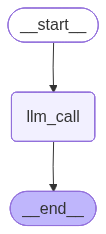

In [38]:
from langgraph.graph import StateGraph, START, END
# Build workflow
agent_builder = StateGraph(State)

# Add nodes
agent_builder.add_node("llm_call", llm_call)

# Add edges to connect nodes
agent_builder.add_edge(START, "llm_call")
agent_builder.add_edge("llm_call", END)

# Compile the agent
agent = agent_builder.compile()

# Show the agent
from IPython.display import Image, display
display(Image(agent.get_graph(xray=True).draw_mermaid_png()))



## `Test`

In [39]:
while True:
    user_question = input('ask a question: ')

    if user_question.lower() in ["quit", "exit", "q"]:
        break    

    input_state = State(
        question = HumanMessage(content=user_question)
    )
    output_state = agent.invoke(input_state)

    output_state['question'].pretty_print()
    output_state['answer'].pretty_print()

    

ValueError: Invalid input type <class 'langchain_core.messages.human.HumanMessage'>. Must be a PromptValue, str, or list of BaseMessages.